
<div style="color:white;display:fill;
            background-color:#8a0a3d;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>Importing Libraries</b></p>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

from termcolor import colored


<div style="color:white;display:fill;
            background-color:#8a0a3d;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>Loading Data</b></p>
</div>

In [2]:
df=pd.read_csv("../input/tabular-playground-series-jul-2022/data.csv")
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [3]:
sample=pd.read_csv("../input/tabular-playground-series-jul-2022/sample_submission.csv")
sample

,Id,Predicted
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
97995,97995,0
97996,97996,0
97997,97997,0
97998,97998,0


<div style="color:white;display:fill;
            background-color:#8a0a3d;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>Data types</b></p>
</div>


In [4]:
df.dtypes

id        int64
f_00    float64
f_01    float64
f_02    float64
f_03    float64
f_04    float64
f_05    float64
f_06    float64
f_07      int64
f_08      int64
f_09      int64
f_10      int64
f_11      int64
f_12      int64
f_13      int64
f_14    float64
f_15    float64
f_16    float64
f_17    float64
f_18    float64
f_19    float64
f_20    float64
f_21    float64
f_22    float64
f_23    float64
f_24    float64
f_25    float64
f_26    float64
f_27    float64
f_28    float64
dtype: object

There are **7 discrete** features and **22 continuous** features.

In [5]:
discrete_cols=[f'f_0{i}' for i in range(7,10)]
discrete_cols=discrete_cols+[f'f_{i}' for i in range(10,14)]
cont_cols=[]
for cols in df.columns:
    if cols not in discrete_cols:
        cont_cols.append(cols)
cont_cols=cont_cols[1:]

print(colored('Continues Columns:', attrs=['bold']),cont_cols)
print(colored('Discrete Columns:', attrs=['bold']),discrete_cols)
print(len(cont_cols)+len(discrete_cols))

Continues Columns: ['f_00', 'f_01', 'f_02', 'f_03', 'f_04', 'f_05', 'f_06', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28']
Discrete Columns: ['f_07', 'f_08', 'f_09', 'f_10', 'f_11', 'f_12', 'f_13']
29


<div style="color:white;display:fill;
            background-color:#8a0a3d;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 4px;color:white;"><b>Exploring</b></p>
</div>

In [6]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


there seem to be some outliers especially in the discrete columns

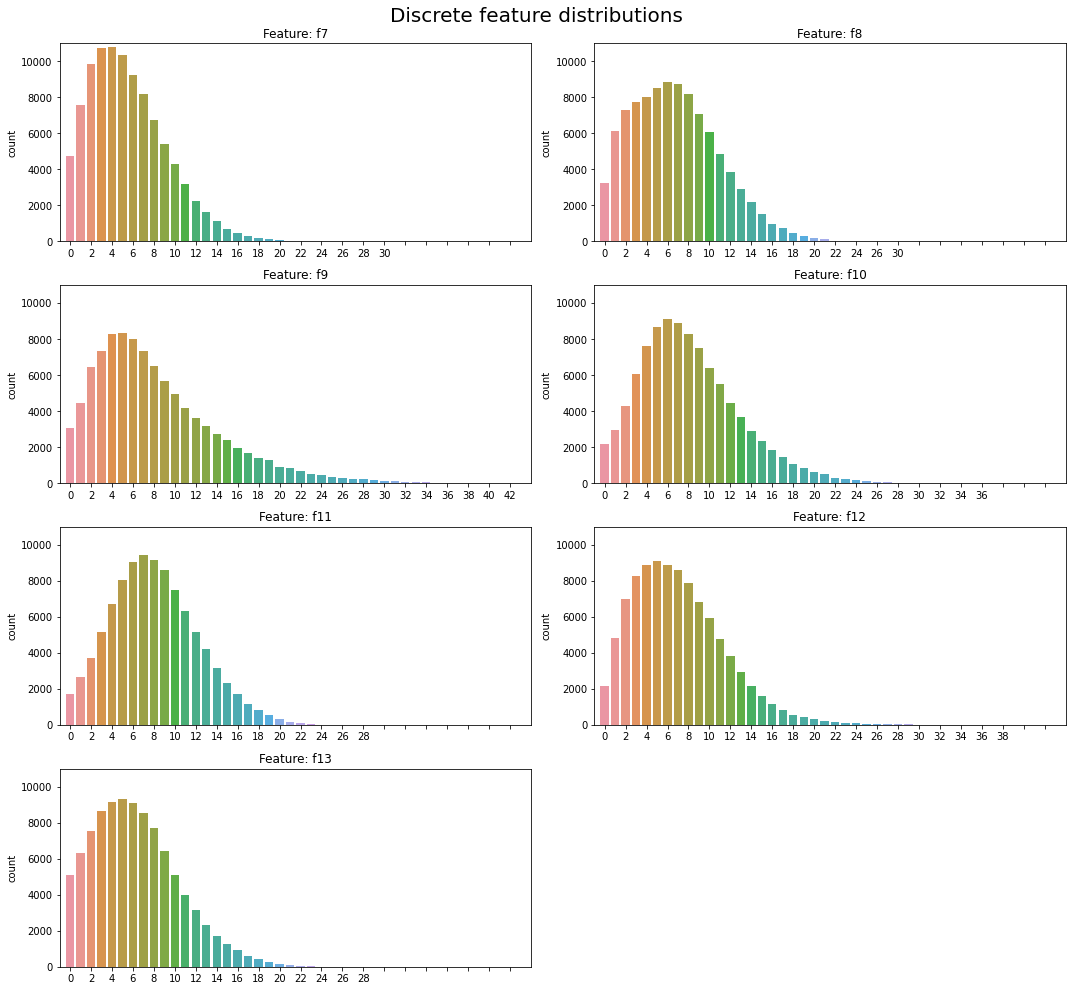

In [7]:
# Figure with subplots
fig=plt.figure(figsize=(15,14))
tdf=df.drop('id',axis=1)
for i in range(len(discrete_cols)):
    # New subplot
    plt.subplot(4,2,i+1)
    feat_num=i+7
    sns.countplot(x=tdf[discrete_cols[i]])
    
    # Aesthetics
    plt.title(f'Feature: f{feat_num}')
    plt.xlim([-1,44])      # same scale for all plots
    plt.ylim([0,11000])   # same scale for all plots
    plt.xticks(np.arange(0,44,2))
    plt.xlabel('')
    
# Overall aesthetics
fig.suptitle('Discrete feature distributions',  size=20)
fig.tight_layout()  # Improves appearance a bit
plt.show()

the discrete columns are **not normally distributed**

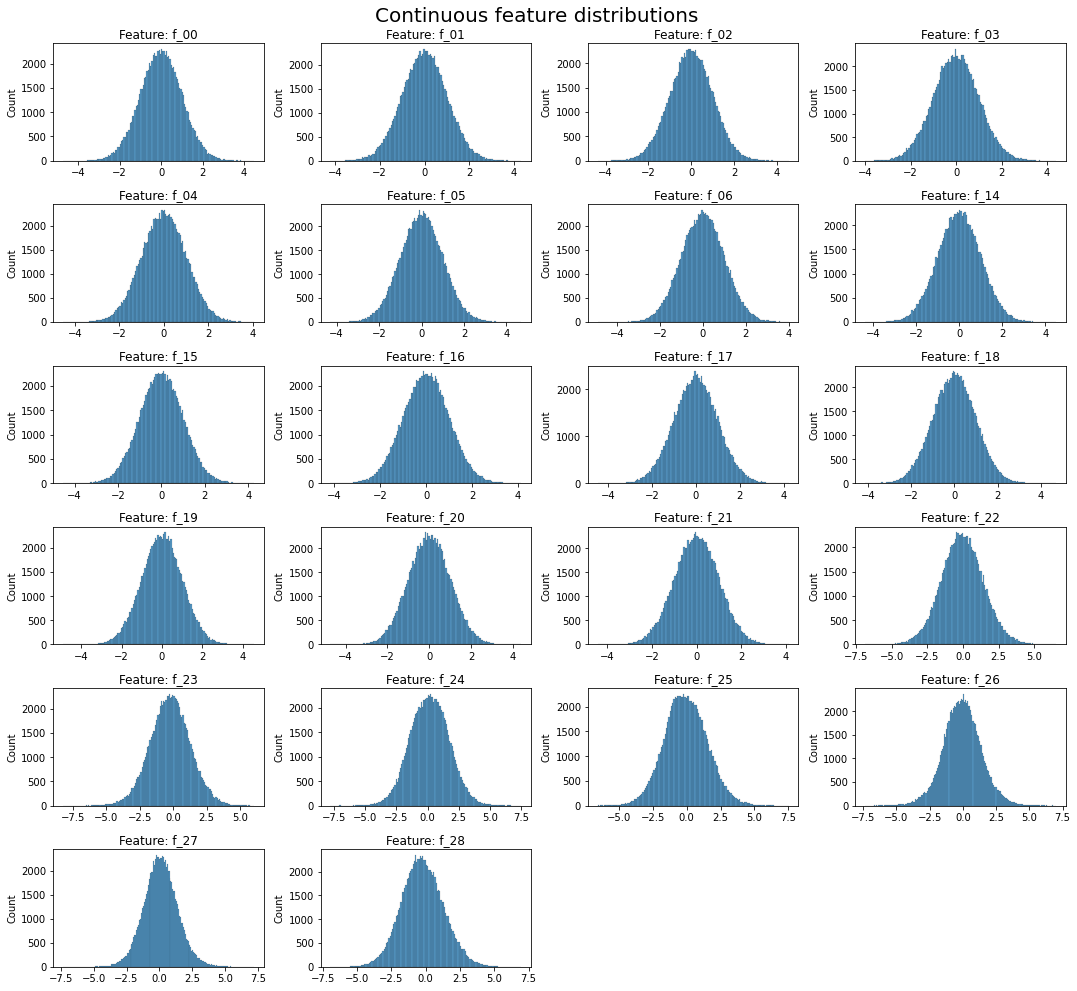

In [8]:
fig=plt.figure(figsize=(15,14))
tdf=df.drop('id',axis=1)
for i, f in enumerate(cont_cols):
    # New subplot
    plt.subplot(6,4,i+1)
    sns.histplot(x=df[f])
    
    # Aesthetics
    plt.title(f'Feature: {f}')
    plt.xlabel('')
    
# Overall aesthetics
fig.suptitle('Continuous feature distributions',  size=20)
fig.tight_layout()  # Improves appearance a bit
plt.show()

the colmuns columns are **mostly normally distributed**

In [9]:
test=df.drop('id',axis=1)

In [10]:
from scipy import stats
df=df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [11]:
X=df.drop('id',axis=1)
X

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,8,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,2,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,10,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,11,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


In [12]:
from sklearn.preprocessing import PowerTransformer
def transform(tdf,tdf_1):
    m=PowerTransformer().fit(tdf)
    scaled_features = m.transform(tdf_1)
    scaled_features_df = pd.DataFrame(scaled_features, index=tdf_1.index, columns=tdf_1.columns)
    return scaled_features_df

In [13]:
test=transform(X,test)
X=transform(X,X)

In [14]:
X

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.394641,-0.928532,0.656420,0.598011,-0.834357,0.743137,2.296786,-1.019978,1.409499,1.113656,...,-0.480520,-0.763393,-0.772293,-0.727943,0.932315,-0.694335,0.786709,0.996521,1.087304,0.722307
1,-0.697836,-0.464666,0.661731,1.008735,-1.664504,0.875036,-0.086951,-1.019978,-0.925551,-0.188519,...,-0.430520,-0.089671,-1.800415,-0.551969,0.465050,1.050561,-0.123447,-0.579391,0.381377,-1.665650
2,0.820076,0.323402,-1.183975,-0.631833,0.110447,0.794122,2.022732,-0.006606,1.023380,-0.409857,...,-0.415145,-1.617718,1.212861,2.263728,0.089094,-1.547787,-0.585673,1.015848,-0.956245,-2.338123
3,-0.507423,0.226631,0.265509,0.236175,0.422665,-1.235457,0.146136,0.269005,-1.262425,0.979976,...,0.627990,1.300096,0.541790,0.747151,-1.258434,0.840872,-1.205059,-0.416802,-0.104283,0.343678
4,-0.679659,-1.056603,-0.275624,-1.857442,-0.288631,-1.874002,0.798913,0.765020,0.157462,-0.409857,...,-1.637738,-0.438079,0.327801,0.230065,-1.532831,0.862865,-0.632050,1.209017,-0.387812,-1.179230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,0.240295,1.674930,-0.698890,0.319388,-0.297643,0.333423,1.636402,-0.006606,0.157462,0.200730,...,-0.290740,-0.259528,-0.984189,0.974804,0.418025,1.308777,-0.079892,-1.038070,0.172886,0.480409
97996,0.326579,0.714487,0.568666,-1.340215,-0.356847,0.184445,0.186458,-0.640312,0.608881,-1.262045,...,0.120798,1.401354,0.348030,1.187014,-0.442432,0.273708,0.802449,0.143597,0.721062,0.666116
97997,-0.252929,-0.470321,1.917266,-1.359122,0.200804,-0.566100,-0.380680,0.765020,0.608881,0.538796,...,-0.854910,-1.805012,-1.280998,-1.021888,1.480470,0.882407,0.182960,1.599223,1.230005,0.609624
97998,0.315134,2.211290,0.770749,0.443895,0.473041,0.063244,-0.334202,-1.472556,0.388490,0.693423,...,-0.008991,1.129813,1.595806,0.281228,0.525277,0.698733,-0.296168,-1.137997,-0.557268,0.140528


In [15]:
#from yellowbrick.cluster import KElbowVisualizer
#from sklearn.cluster import KMeans

#model = KMeans()
#visualizer = KElbowVisualizer(model, k=(4,13))

#visualizer.fit(X)        # Fit the data to the visualizer
#visualizer.show()    

In [16]:
#df_sample = df.sample(n=10000)
#df_sample

In [17]:
#X=X[['f_10','f_09','f_23','f_12','f_22','f_25','f_07','f_11','f_08']]
#test=test[['f_10','f_09','f_23','f_12','f_22','f_25','f_07','f_11','f_08']]

In [18]:
from sklearn.mixture import GaussianMixture
gm_trial= GaussianMixture(n_components=7, n_init=3).fit(X)

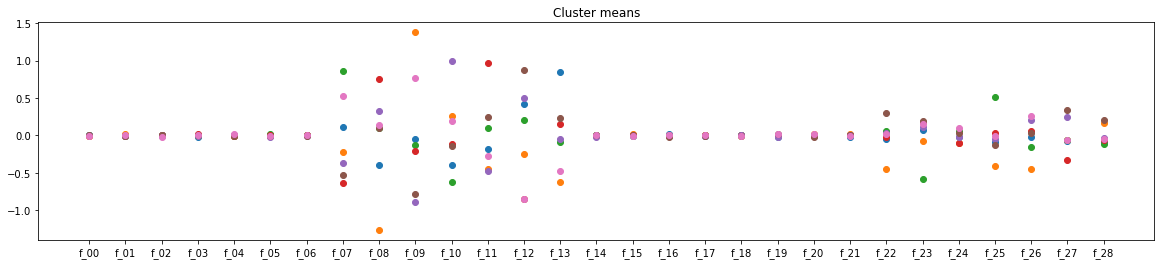

In [19]:
plt.figure(figsize=(20,4))
for i in range(gm_trial.means_.shape[0]):
    plt.scatter(np.arange(X.shape[1]), gm_trial.means_[i])
plt.xticks(ticks=np.arange(X.shape[1]), labels=X.columns)
plt.title('Cluster means')
plt.show()

In [20]:
unused_cols=[f'f_0{i}' for i in range(7)]
unused_cols=unused_cols+[f'f_{i}' for i in range(14,22)]
unused_cols

['f_00',
 'f_01',
 'f_02',
 'f_03',
 'f_04',
 'f_05',
 'f_06',
 'f_14',
 'f_15',
 'f_16',
 'f_17',
 'f_18',
 'f_19',
 'f_20',
 'f_21']

In [21]:
X=X.drop(unused_cols,axis=1)
test=test.drop(unused_cols,axis=1)

In [22]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=7, n_init=3).fit(X)

In [23]:
y=bgm.predict(test)

In [24]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(random_state=1)


In [25]:
#from sklearn.model_selection import GridSearchCV
#param_grid = [
 #{'boosting_type': ['gbdt', 'dart', 'goss','rf'],
 # 'num_leaves':[10,31,21,40]
 #}]
#grid_search = GridSearchCV(clf, param_grid, cv=5,scoring='adjusted_rand_score',
#return_train_score=True)
#grid_search.fit(test, bgm.predict(test))


In [26]:
#grid_search.best_estimator_

In [27]:
model=lgb.LGBMClassifier(boosting_type='goss', num_leaves=21, random_state=1)
model.fit(test, y)
sample['Predicted']=model.predict(test)

In [28]:
#from sklearn.naive_bayes import BernoulliNB
#clf = BernoulliNB()
#clf.fit(X, y)
#sample['Predicted']=clf.predict(test)

In [29]:
newdf=df.drop('id',axis=1)
newdf=newdf.drop(unused_cols,axis=1)
newdf['target']=sample['Predicted']

In [30]:
df.corrwith(newdf['target']).sort_values(ascending=False)

f_07    0.167251
f_12    0.151659
f_13    0.145076
f_26    0.119354
f_23    0.083102
f_10    0.078274
f_27    0.077520
f_22    0.047890
f_24    0.025711
f_04    0.007372
f_16    0.006159
f_00    0.001257
f_06    0.001080
f_18    0.000703
f_14   -0.000282
f_01   -0.000349
f_20   -0.001177
id     -0.002252
f_19   -0.002894
f_21   -0.003528
f_17   -0.003570
f_03   -0.004167
f_05   -0.004217
f_15   -0.004339
f_02   -0.004702
f_28   -0.020394
f_25   -0.038937
f_09   -0.054922
f_08   -0.095115
f_11   -0.298977
dtype: float64

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca=pca.fit_transform(test)
PCA_df = pd.DataFrame({"PCA_1" : X_pca[:,0], "PCA_2" : X_pca[:,1]})
PCA_df['class']=sample['Predicted']
PCA_df.nunique()

PCA_1    98000
PCA_2    98000
class        7
dtype: int64

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

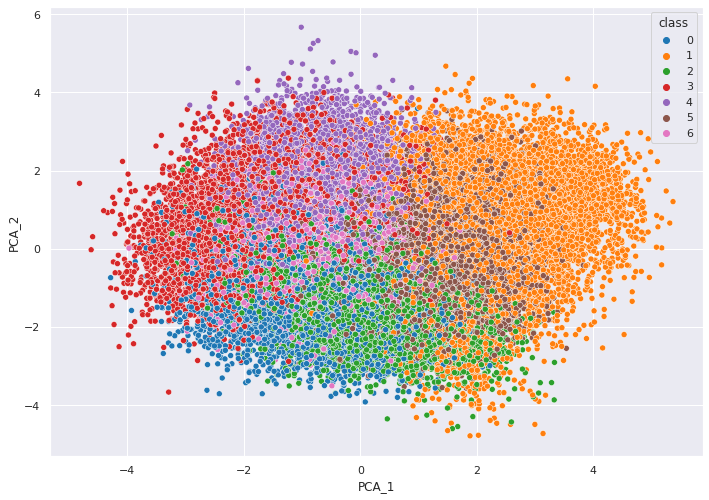

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = PCA_df, x = PCA_df["PCA_1"], y = PCA_df["PCA_2"], hue=PCA_df["class"],palette='tab10')

In [33]:
sample

,Id,Predicted
0,0,0
1,1,6
2,2,0
3,3,1
4,4,2
...,...,...
97995,97995,6
97996,97996,3
97997,97997,5
97998,97998,4


In [34]:
sample.groupby(['Predicted']).size()

Predicted
0    13679
1    12932
2    16988
3    15641
4    11478
5    16274
6    11008
dtype: int64

In [35]:
sample.to_csv('submission.csv', index=False)